In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

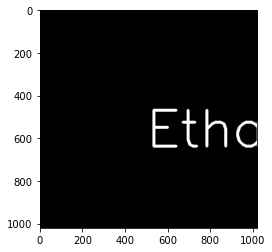

In [11]:
#main

#set up variables
image = "image.jpg"
key = 1234
secret_word = "Ethan"

# make ownership share
ownership = makeownership(image,key,secret_word)

# make master share
master = makemaster(image,key)

# make master imposter image

#master = makemaster("imposter.jpg",key)

# make decoder
decoder = makedecoder(ownership,master)

plt.imshow(decoder, cmap="gray")



In [8]:
# generate ownership share 
def makeownership(IMAGE,KEY,MESSAGE):
   #variables
    src = cv2.imread(IMAGE, cv2.IMREAD_GRAYSCALE)
    random.seed(KEY)
    sampleRate=5

    #Get average of image
    popAve = np.average(src)

    #Create share filled with zeros
    share = np.zeros((src.shape[0]*2,src.shape[1]*2))

    #Create Secret image with text
    secret = np.zeros(src.shape)
    secret = cv2.putText(secret, MESSAGE, (250, int(2.5*src.shape[0] / 4)), cv2.FONT_HERSHEY_SIMPLEX, 4, 255, 6, cv2.LINE_AA)

    #Check if each pixel is higher or lower than the average and fill share
    for r in range(src.shape[0]): 
        for c in range(src.shape[1]): 
    
            #Grab 5 random pixels and take the averge of it
            sampleAve = 0 
            for i in range(sampleRate):
                #grab rand pix
                randNum = random.randint(0, (src.shape[0]*src.shape[1]-1))
                #convert pixnumber 1d to 2d
                pixRow = randNum % src.shape[0]
                pixCol = int(randNum / src.shape[0])
                #add to sample
                sampleAve += src[pixRow][pixCol]

            #Calculate Sample Average
            sampleAve = sampleAve/sampleRate

            #Fill share according to paper
            if((secret[r][c] == 0 and sampleAve < popAve) or (secret[r][c] == 255 and sampleAve >= popAve)):
                share[2*r+1][2*c] = 1
                share[2*r][2*c+1] = 1
            else:
                share[2*r][2*c] = 1
                share[2*r+1][2*c+1] = 1 
    return share 

    

In [9]:
# generate master share
def makemaster(IMAGE,KEY):

   
    #variables
    src = cv2.imread(IMAGE, cv2.IMREAD_GRAYSCALE)
    random.seed(KEY)
    sampleRate=5

    #Get average of image
    popAve = np.average(src)

    #Create share filled with zeros
    share = np.zeros((src.shape[0]*2,src.shape[1]*2))

    #Check if each pixel is higher or lower than the average and fill share
    for r in range(src.shape[0]): 
        for c in range(src.shape[1]): 
    
            #Grab 5 random pixels and take the averge of it
            sampleAve = 0 
            for i in range(sampleRate):
                #grab rand pix
                randNum = random.randint(0, (src.shape[0]*src.shape[1]-1))
                #convert pixnumber 1d to 2d
                pixRow = randNum % src.shape[0]
                pixCol = int(randNum / src.shape[0])
                #add to sample
                sampleAve += src[pixRow][pixCol]

            #Calculate Sample Average
            sampleAve = sampleAve/sampleRate

            #Fill share according to paper
            if(sampleAve < popAve):
                share[2*r+1][2*c] = 1
                share[2*r][2*c+1] = 1
            else:
                share[2*r][2*c] = 1
                share[2*r+1][2*c+1] = 1 
    return share

In [10]:
# decode image 
def makedecoder(ownership,master):
    dst = np.zeros(ownership.shape)
    for r in range(ownership.shape[0]): 
        for c in range(ownership.shape[1]): 
            if(master[r][c] != ownership[r][c]):
                dst[r][c] = 255
    return dst